In [50]:
import matplotlib.pyplot as plt

In [51]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)


In [52]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

<IPython.core.display.Javascript object>


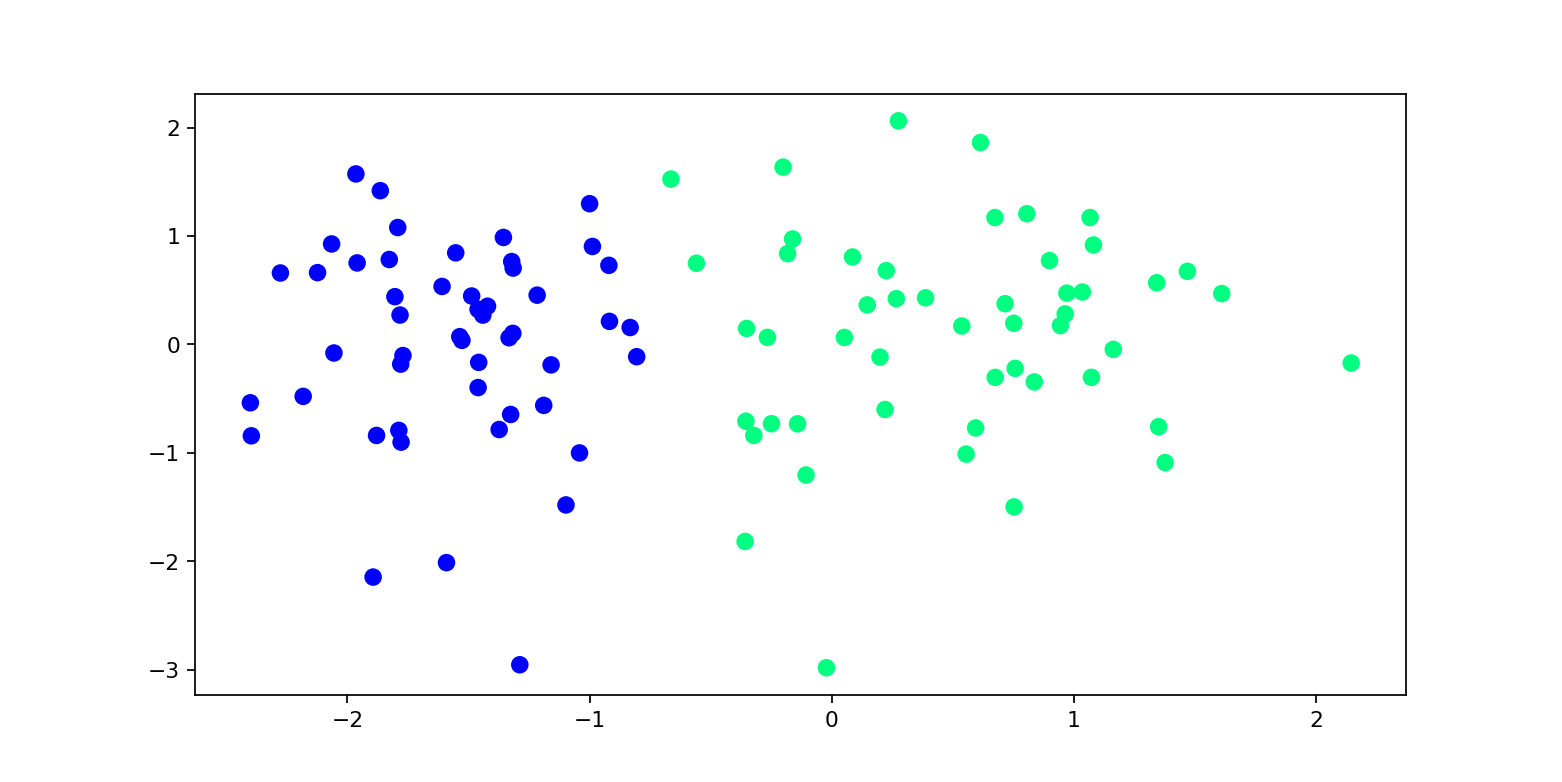

In [53]:
plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=50)

In [54]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights+lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [55]:
def step(z):
    return 1 if z>0 else 0

In [56]:
intercept_,coef_ = perceptron(X,y)

In [57]:
print(coef_)
print(intercept_)

[1.30779516 0.22629161]
0.9


In [58]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [59]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

<IPython.core.display.Javascript object>


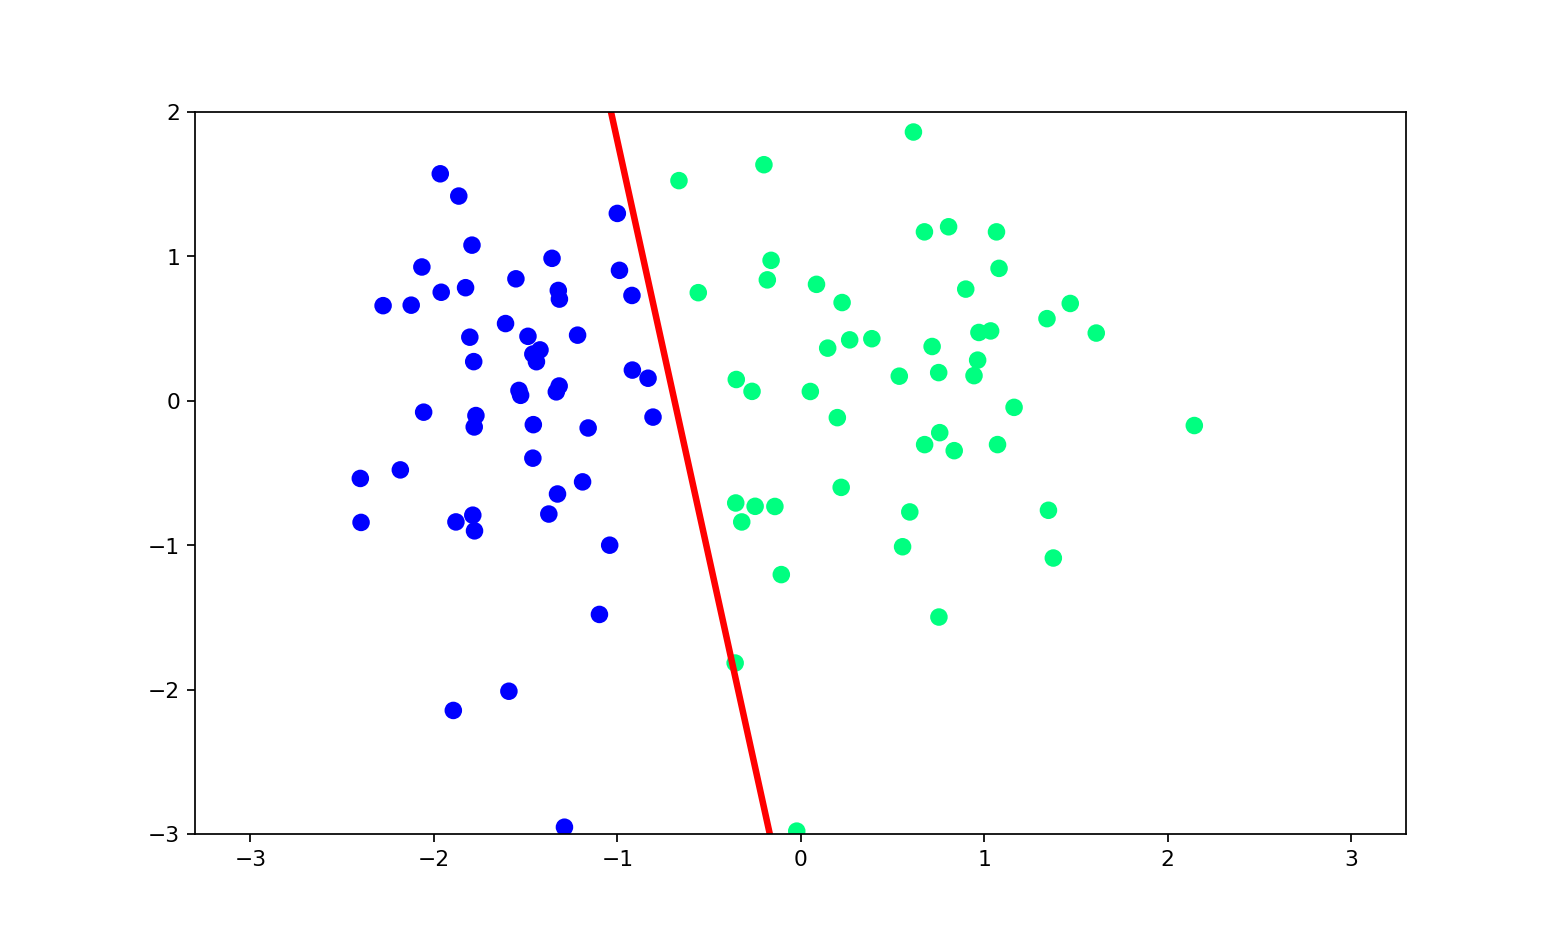

(-3.0, 2.0)

In [60]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth = 3)
plt.scatter(X[:,0],X[:,1],c = y,cmap='winter',s=50)
plt.ylim(-3,2)

In [61]:
def perceptron(X,y):
    m =[]
    b =[]
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [62]:
m,b = perceptron(X,y)

In [63]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


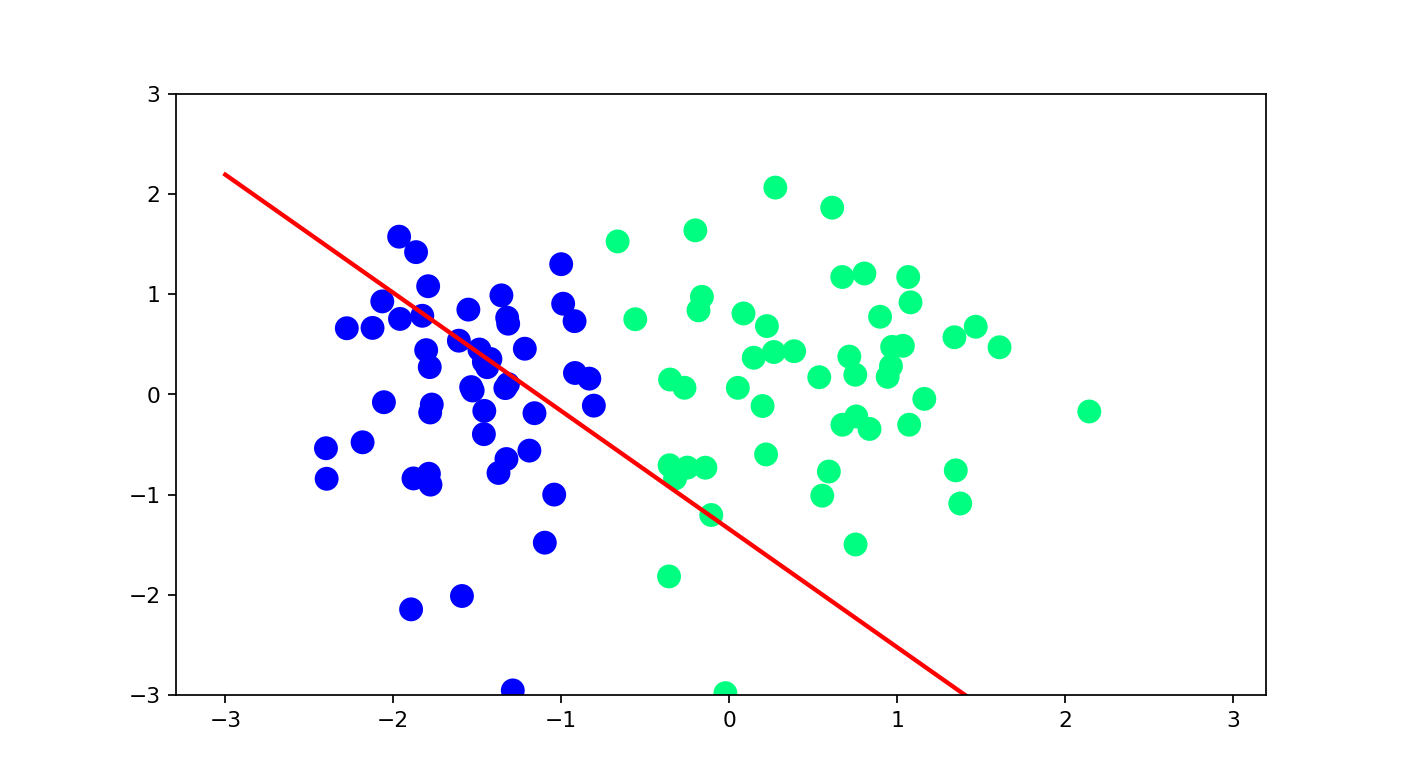

In [65]:
fig, ax = plt.subplots(figsize =(9,5))
x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=100)
line,= ax.plot(x_i,x_i*m[0] +b[0] ,'r-',linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i+1)
    line.set_ydate(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    
anim = FuncAnimation(fig,update,repeat =True,frames = 200,interval =100)